In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
import geopandas as gpd

In [3]:
#importing the data
df = pd.read_csv('covid_19_data.csv')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
country         177 non-null object
country_code    177 non-null object
geometry        177 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 4.2+ KB
        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


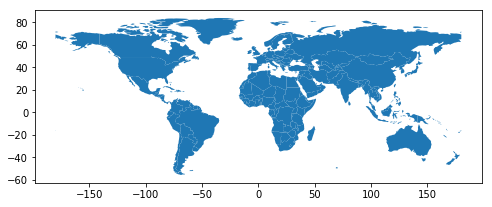

In [4]:
#shapefile for map
shapefile = 'shapefile/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.info()
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

fig,ax = plt.subplots(figsize = (8,8))
gdf.plot(ax = ax)
plt.show()

In [5]:
#want to plot the confirmed cases and deaths onto this graph for each Country/Region


In [6]:
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
df.tail(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4508,4509,03/09/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0
4509,4510,03/09/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4510,4511,03/09/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4511,4512,03/09/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4512,4513,03/09/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 8 columns):
SNo                4513 non-null int64
ObservationDate    4513 non-null object
Province/State     2912 non-null object
Country/Region     4513 non-null object
Last Update        4513 non-null object
Confirmed          4513 non-null float64
Deaths             4513 non-null float64
Recovered          4513 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 282.1+ KB


In [9]:
df['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [10]:
df['Total_confirmed']= df.groupby('Country/Region')['Confirmed'].cumsum()

In [11]:
df['Total_Deaths']= df.groupby('Country/Region')['Deaths'].cumsum()

In [12]:
df['Total_Recovered']= df.groupby('Country/Region')['Recovered'].cumsum()

/Users/Brittney/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


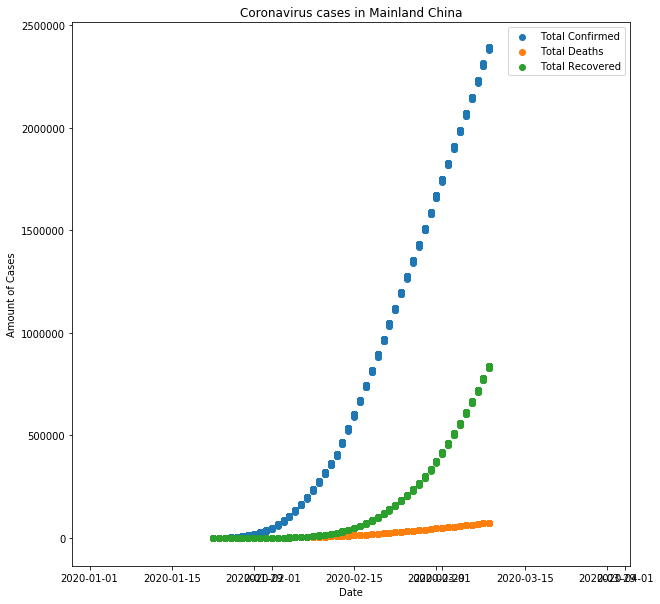

In [13]:
#plot of china from the data frame total confirmed, total deaths, total recovered scatter

x_1 = df[df['Country/Region']=='Mainland China']['ObservationDate']
y_1 = df[df['Country/Region']=='Mainland China']['Total_confirmed']

x_2 = df[df['Country/Region']=='Mainland China']['ObservationDate']
y_2 = df[df['Country/Region']=='Mainland China']['Total_Deaths']

x_3 = df[df['Country/Region']=='Mainland China']['ObservationDate']
y_3 = df[df['Country/Region']=='Mainland China']['Total_Recovered']

x_points_1 = pd.to_datetime(x_1)
x_points_2 = pd.to_datetime(x_2)
x_points_3 = pd.to_datetime(x_3)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_points_1,y_1)
ax.scatter(x_points_2,y_2)
ax.scatter(x_points_3,y_3)

ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Coronavirus cases in Mainland China")
ax.legend(('Total Confirmed','Total Deaths','Total Recovered'))

plt.show()


In [15]:
df_most_confirmed = df[(df['Country/Region']!='Mainland China') & (df['Total_confirmed'] > 3000) & (df['Country/Region']!='Others')]
df_most_confirmed['Country/Region'].value_counts()

US             109
South Korea     14
Italy           10
Iran             8
Japan            7
France           3
Germany          3
Spain            1
Name: Country/Region, dtype: int64

In [19]:
US_c= df[df['Country/Region'] == 'US']['Total_confirmed'].max()
US_d= df[df['Country/Region'] == 'US']['Total_Deaths'].max()
US_r= df[df['Country/Region'] == 'US']['Total_Recovered'].max()

South_Korea_c= df[df['Country/Region'] == 'South Korea']['Total_confirmed'].max()
South_Korea_d= df[df['Country/Region'] == 'South Korea']['Total_Deaths'].max()
South_Korea_r= df[df['Country/Region'] == 'South Korea']['Total_Recovered'].max()

Italy_c= df[df['Country/Region'] == 'Italy']['Total_confirmed'].max()
Italy_d= df[df['Country/Region'] == 'Italy']['Total_Deaths'].max()
Italy_r= df[df['Country/Region'] == 'Italy']['Total_Recovered'].max()

Iran_c= df[df['Country/Region'] == 'Iran']['Total_confirmed'].max()
Iran_d= df[df['Country/Region'] == 'Iran']['Total_Deaths'].max()
Iran_r= df[df['Country/Region'] == 'Iran']['Total_Recovered'].max()

Japan_c= df[df['Country/Region'] == 'Japan']['Total_confirmed'].max()
Japan_d= df[df['Country/Region'] == 'Japan']['Total_Deaths'].max()
Japan_r= df[df['Country/Region'] == 'Japan']['Total_Recovered'].max()

Germany_c= df[df['Country/Region'] == 'Germany']['Total_confirmed'].max()
Germany_d= df[df['Country/Region'] == 'Germany']['Total_Deaths'].max()
Germany_r= df[df['Country/Region'] == 'Germany']['Total_Recovered'].max()

Spain_c= df[df['Country/Region'] == 'Spain']['Total_confirmed'].max()
Spain_d= df[df['Country/Region'] == 'Spain']['Total_Deaths'].max()
Spain_r= df[df['Country/Region'] == 'Spain']['Total_Recovered'].max()

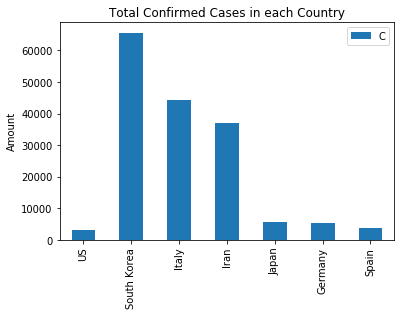

In [20]:
combined_c = pd.DataFrame({'US': US_c, 'South Korea': South_Korea_c,'Italy': Italy_c,'Iran':Iran_c, 'Japan':Japan_c,'Germany':Germany_c,'Spain':Spain_c}, index=[0])
transpose_combined_c = combined_c.transpose()

transpose_combined_c.plot.bar()
#plt.ylim(0,100)
plt.ylabel('Amount')
plt.title('Total Confirmed Cases in each Country')
plt.legend('Confirmed')
plt.show()    
               

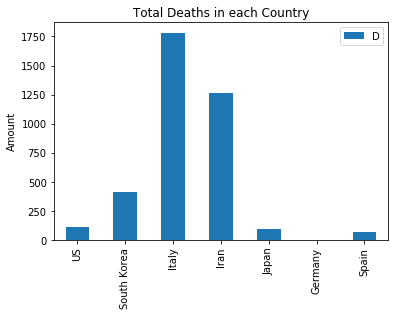

In [22]:
combined_d = pd.DataFrame({'US': US_d, 'South Korea': South_Korea_d,'Italy': Italy_d,'Iran':Iran_d, 'Japan':Japan_d,'Germany':Germany_d,'Spain':Spain_d}, index=[0])
transpose_combined_d = combined_d.transpose()

transpose_combined_d.plot.bar()
#plt.ylim(0,100)
plt.ylabel('Amount')
plt.title('Total Deaths in each Country')
plt.legend('Deaths')
plt.show()  

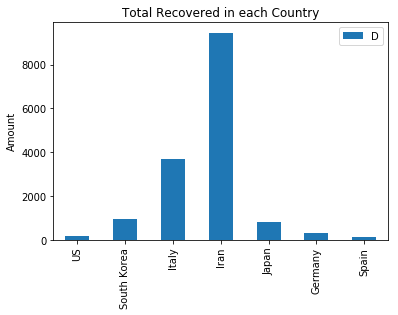

In [25]:
combined_r = pd.DataFrame({'US': US_r, 'South Korea': South_Korea_r,'Italy': Italy_r,'Iran':Iran_r, 'Japan':Japan_r,'Germany':Germany_r,'Spain':Spain_r}, index=[0])
transpose_combined_r = combined_r.transpose()

transpose_combined_r.plot.bar()
#plt.ylim(0,100)
plt.ylabel('Amount')
plt.title('Total Recovered in each Country')
plt.legend('Deaths')
plt.show()

In [32]:
#want to plot the deaths over time for mainland china and other major countries
df_Mainland_China = df[df['Country/Region']=='Mainland China']
df_Italy = df[df['Country/Region']=='Italy']
df_Iran = df[df['Country/Region']=='Iran']
df_US = df[df['Country/Region']=='US']
df_Spain = df[df['Country/Region']=='Spain']
df_SouthKorea = df[df['Country/Region']=='South Korea']

In [34]:
print(len(df_Mainland_China))
print(len(df_Italy))
print(len(df_Iran))
print(len(df_US))
print(len(df_SouthKorea))
print(len(df_Spain))

1482
39
20
899
48
38


In [35]:
df_Mainland_China.loc[:,'Total Confirmed'] = df_Mainland_China['Confirmed'].cumsum()
df_Mainland_China.loc[:,'Total Deaths'] = df_Mainland_China['Deaths'].cumsum()
df_Mainland_China.loc[:,'Total Recovered'] = df_Mainland_China['Recovered'].cumsum()

df_Italy.loc[:,'Total Confirmed'] = df_Italy['Confirmed'].cumsum()
df_Italy.loc[:,'Total Deaths'] = df_Italy['Deaths'].cumsum()
df_Italy.loc[:,'Total Recovered'] = df_Italy['Recovered'].cumsum()

df_Iran.loc[:,'Total Confirmed'] = df_Iran['Confirmed'].cumsum()
df_Iran.loc[:,'Total Deaths'] = df_Iran['Deaths'].cumsum()
df_Iran.loc[:,'Total Recovered'] = df_Iran['Recovered'].cumsum()

df_US.loc[:,'Total Confirmed'] = df_US['Confirmed'].cumsum()
df_US.loc[:,'Total Deaths'] = df_US['Deaths'].cumsum()
df_US.loc[:,'Total Recovered'] = df_US['Recovered'].cumsum()

df_SouthKorea.loc[:,'Total Confirmed'] = df_SouthKorea['Confirmed'].cumsum()
df_SouthKorea.loc[:,'Total Deaths'] = df_SouthKorea['Deaths'].cumsum()
df_SouthKorea.loc[:,'Total Recovered'] = df_SouthKorea['Recovered'].cumsum()

df_Spain.loc[:,'Total Confirmed'] = df_Spain['Confirmed'].cumsum()
df_Spain.loc[:,'Total Deaths'] = df_Spain['Deaths'].cumsum()
df_Spain.loc[:,'Total Recovered'] = df_Spain['Recovered'].cumsum()

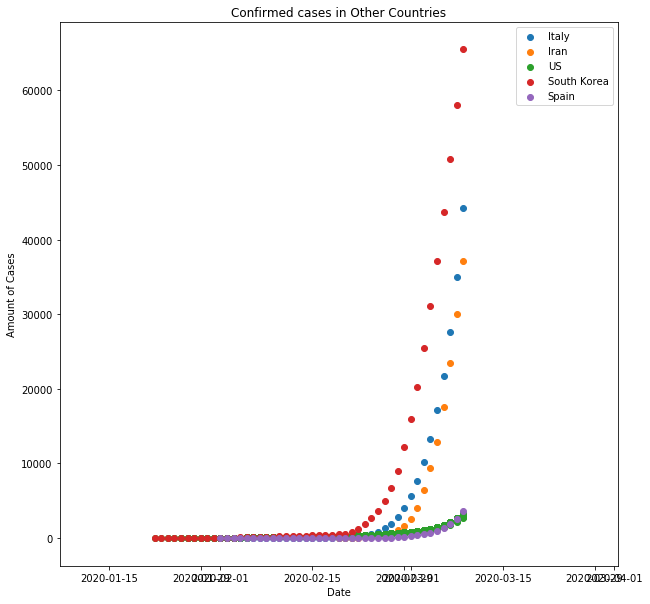

In [37]:
#Total Confirmed Cases plot    add the death plot and the recovered to this printout

x_2 = df_Italy['ObservationDate'] 
y_2 = df_Italy['Total Confirmed']

x_3 = df_Iran['ObservationDate'] 
y_3 = df_Iran['Total Confirmed']

x_4 = df_US['ObservationDate'] 
y_4 = df_US['Total Confirmed']

x_5 = df_SouthKorea['ObservationDate']
y_5 = df_SouthKorea['Total Confirmed']

x_6 = df_Spain['ObservationDate']
y_6 = df_Spain['Total Confirmed']


x_points_2 = pd.to_datetime(x_2)
x_points_3 = pd.to_datetime(x_3)
x_points_4 = pd.to_datetime(x_4)
x_points_5 = pd.to_datetime(x_5)
x_points_6 = pd.to_datetime(x_6)

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(x_points_2,y_2)
ax.scatter(x_points_3,y_3)
ax.scatter(x_points_4,y_4)
ax.scatter(x_points_5,y_5)
ax.scatter(x_points_6,y_6)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Confirmed cases in Other Countries")
ax.legend(('Italy','Iran','US','South Korea','Spain'))

plt.show()

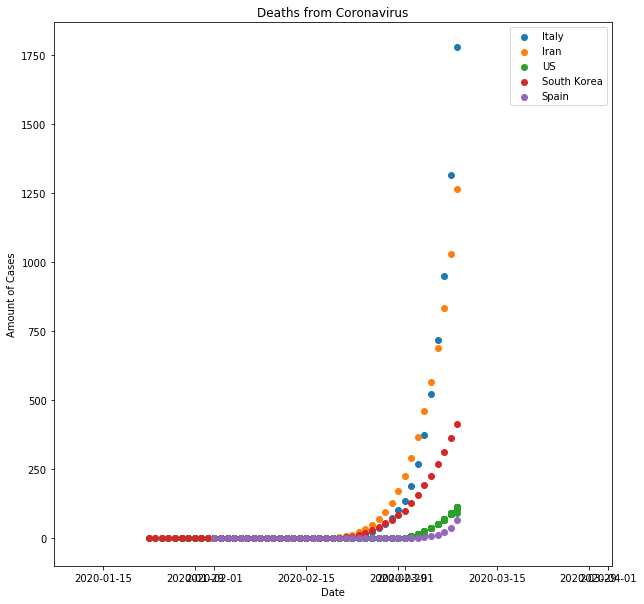

In [39]:
x_2 = df_Italy['ObservationDate'] 
y_2 = df_Italy['Total Deaths']

x_3 = df_Iran['ObservationDate'] 
y_3 = df_Iran['Total Deaths']

x_4 = df_US['ObservationDate'] 
y_4 = df_US['Total Deaths']

x_5 = df_SouthKorea['ObservationDate']
y_5 = df_SouthKorea['Total Deaths']

x_6 = df_Spain['ObservationDate']
y_6 = df_Spain['Total Deaths']

x_points_2 = pd.to_datetime(x_2)
x_points_3 = pd.to_datetime(x_3)
x_points_4 = pd.to_datetime(x_4)
x_points_5 = pd.to_datetime(x_5)
x_points_6 = pd.to_datetime(x_6)

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(x_points_2,y_2)
ax.scatter(x_points_3,y_3)
ax.scatter(x_points_4,y_4)
ax.scatter(x_points_5,y_5)
ax.scatter(x_points_6,y_6)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Deaths from Coronavirus")
ax.legend(('Italy','Iran','US','South Korea','Spain'))

plt.show()

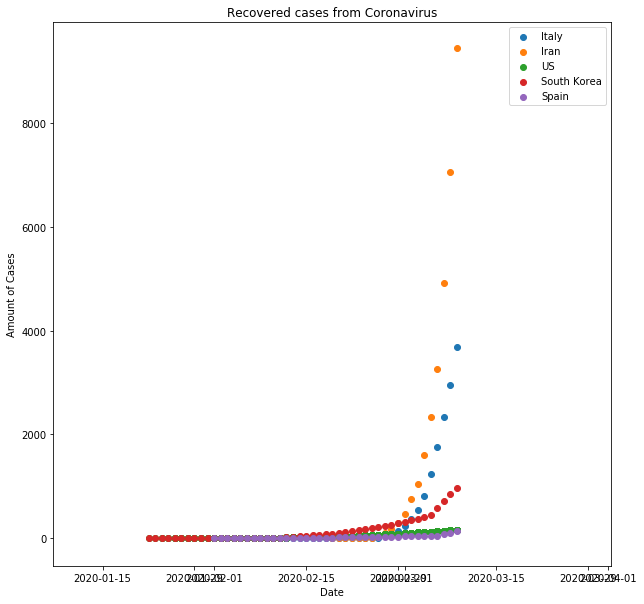

In [40]:
x_2 = df_Italy['ObservationDate'] 
y_2 = df_Italy['Total Recovered']

x_3 = df_Iran['ObservationDate'] 
y_3 = df_Iran['Total Recovered']

x_4 = df_US['ObservationDate'] 
y_4 = df_US['Total Recovered']

x_5 = df_SouthKorea['ObservationDate']
y_5 = df_SouthKorea['Total Recovered']

x_6 = df_Spain['ObservationDate']
y_6 = df_Spain['Total Recovered']

x_points_2 = pd.to_datetime(x_2)
x_points_3 = pd.to_datetime(x_3)
x_points_4 = pd.to_datetime(x_4)
x_points_5 = pd.to_datetime(x_5)
x_points_6 = pd.to_datetime(x_6)

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(x_points_2,y_2)
ax.scatter(x_points_3,y_3)
ax.scatter(x_points_4,y_4)
ax.scatter(x_points_5,y_5)
ax.scatter(x_points_6,y_6)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Recovered cases from Coronavirus")
ax.legend(('Italy','Iran','US','South Korea','Spain'))

plt.show()

In [ ]:
#plot each total confirmed, deaths on a country map
